# E COMMERCE ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## dataset 

In [2]:
# Sample e-commerce sales data
np.random.seed(42)
data = {
    "Product Category": np.random.choice(['Electronics', 'Clothing', 'Home Goods'], size=100),
    "Sales Volume": np.random.randint(1, 20, size=100),
    "Price": np.random.randint(20, 500, size=100),
    "Customer Age": np.random.randint(18, 60, size=100),
    "Time": pd.date_range(start='2024-01-01', periods=100, freq='D')
}

# Create DataFrame
df = pd.DataFrame(data)

# Extract Date from Time for easier grouping
df['Date'] = df['Time'].dt.date


##  Grouping

In [3]:
# 1. Grouping by Product Category and Date
grouped_sales = df.groupby(['Product Category', 'Date']).agg({'Sales Volume': 'sum'}).reset_index()

# 2. Grouping by Customer Age and Product Category
df['Age Group'] = pd.cut(df['Customer Age'], bins=[18, 25, 35, 45, 60], labels=['18-25', '26-35', '36-45', '46-60'])
grouped_by_age = df.groupby(['Age Group', 'Product Category']).agg({'Sales Volume': 'sum'}).reset_index()


## sales volume by product- chart

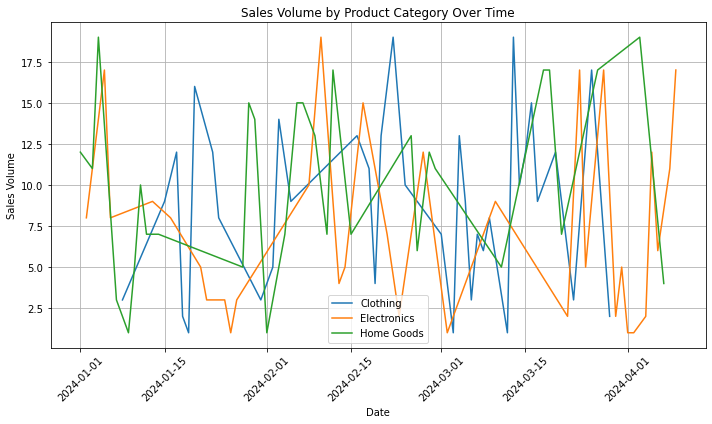

In [4]:
# 3. Visualizing Sales Volume by Product Category over Time (Line Chart)
plt.figure(figsize=(10, 6))
for category in grouped_sales['Product Category'].unique():
    category_data = grouped_sales[grouped_sales['Product Category'] == category]
    plt.plot(category_data['Date'], category_data['Sales Volume'], label=category)

plt.title('Sales Volume by Product Category Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## sales volume by age - bar chart

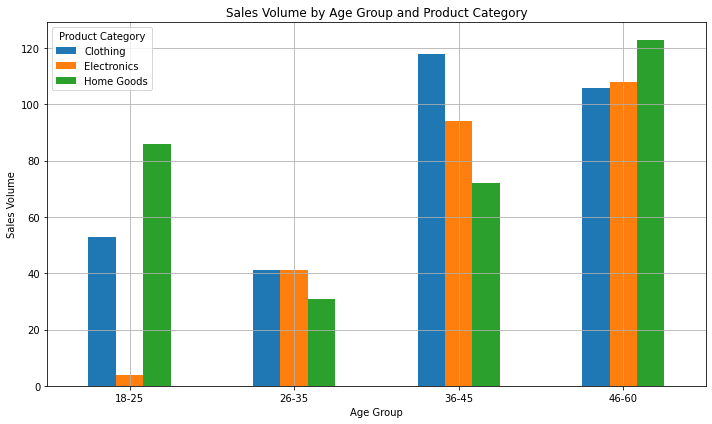

In [5]:
# 4. Visualizing Sales Volume by Age Group and Product Category (Bar Chart)
pivot_age = grouped_by_age.pivot_table(index='Age Group', columns='Product Category', values='Sales Volume', aggfunc='sum')

pivot_age.plot(kind='bar', figsize=(10, 6))
plt.title('Sales Volume by Age Group and Product Category')
plt.xlabel('Age Group')
plt.ylabel('Sales Volume')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


## sales volume by price 

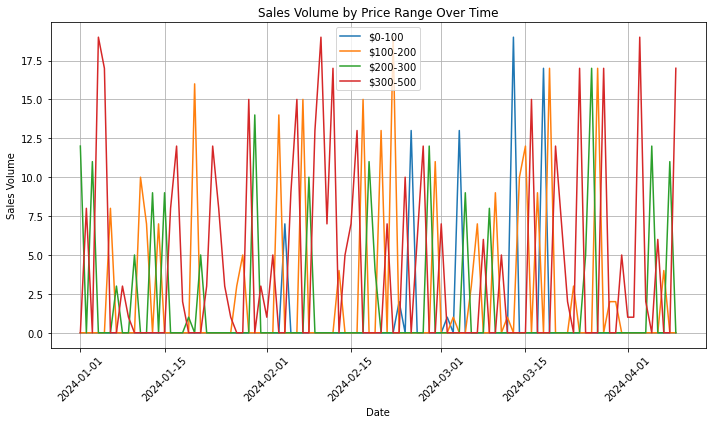

In [6]:
# 5. Visualizing Sales Volume by Price Range Over Time (Line Chart)
df['Price Range'] = pd.cut(df['Price'], bins=[0, 100, 200, 300, 500], labels=['$0-100', '$100-200', '$200-300', '$300-500'])

# Group by Price Range and Date
grouped_by_price = df.groupby(['Price Range', 'Date']).agg({'Sales Volume': 'sum'}).reset_index()

# Plotting sales volume by price range over time
plt.figure(figsize=(10, 6))
for price_range in grouped_by_price['Price Range'].unique():
    price_data = grouped_by_price[grouped_by_price['Price Range'] == price_range]
    plt.plot(price_data['Date'], price_data['Sales Volume'], label=price_range)

plt.title('Sales Volume by Price Range Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()